In [64]:
import keras
import os
import pprint

# Load Model

In [65]:
% ls "model\"

 Volume in drive C is OS
 Volume Serial Number is D4F8-2F03

 Directory of C:\Users\mattt_000\Documents\MachineLearning101\MachineLearning101\NMIST\model

18/08/2019  17:29    <DIR>          .
18/08/2019  17:29    <DIR>          ..
18/08/2019  11:08            78,480 20190818 110820.keras
18/08/2019  11:21            78,480 20190818 112143.keras
18/08/2019  17:29            78,480 20190818 172933.keras
               3 File(s)        235,440 bytes
               2 Dir(s)  27,359,383,552 bytes free


In [66]:
filename = '20190818 172933.keras'
filepath = os.path.join('model',filename)
model = keras.models.load_model(filepath)
print(model.summary())
pprint.pprint(model.get_config())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
{'build_input_shape': [None, 784],
 'layers': [{'class_name': 'Dense',
             'config': {'activation': 'softmax',
                        'activity_regularizer': None,
                        'bias_constraint': None,
                        'bias_initializer': {'class_name': 'Zeros',
                                             'config': {}},
                        'bias_regularizer': None,
                        'kernel_constraint': None,
                        'kernel_initializer': {'class_name': 'VarianceScaling',
                                               'config': {'distribution': 'uniform',
                                              

# Make a prediction

In [67]:
import os
import struct
import numpy as np
import gzip
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte.gz' % kind)
        
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return images, labels

In [68]:
X_test, y_test = load_mnist('data/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))
y_test_orig = y_test

Rows: 10000, columns: 784


In [69]:
import random
i = random.randrange(X_test.shape[0])
X = X_test[i]/255

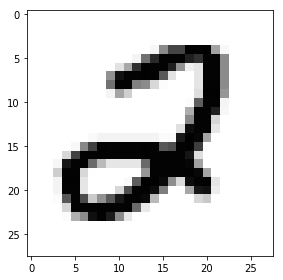

In [70]:
import matplotlib.pyplot as plt

img = X.reshape(28, 28)
plt.imshow(img, cmap='Greys', interpolation='nearest')

plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

In [71]:
#expand dims needed because model.predict expects a a 2D array of shape (num_instances, features)
print(model.predict(np.expand_dims(X, axis=0), verbose=1))
#expand dims needed because model.predict expects a a 2D array of shape (num_instances, features)
print(model.predict_classes(np.expand_dims(X, axis=0), verbose=1))

1/1 [==============================] - 0s 47ms/step
[[1.6127527e-05 7.8669615e-14 9.9936861e-01 6.0537120e-04 5.6937655e-08
  9.4129909e-06 1.2634236e-08 6.8006303e-14 5.5854832e-07 7.0467564e-12]]
1/1 [==============================] - 0s 1ms/step
[2]


# How is the prediction made?

In [72]:
X = X_test[i].copy()

print(f'There are {len(X)} values (pixels) in each image')
print(f'The values range from {min(X)} to {max(X)}. 0 = White, 255 = Blank.')
print(f'The values are divided by 255 to remap them to between 0 and 1')
X /= 255
print(f'The new values range from {min(X)} to {max(X)}. 0 = White, 1 = Blank.')

There are 784 values (pixels) in each image
The values range from 0.0 to 255.0. 0 = White, 255 = Blank.
The values are divided by 255 to remap them to between 0 and 1
The new values range from 0.0 to 1.0. 0 = White, 1 = Blank.


In [73]:
print(f'There are {len(model.layers)} layers in the model')
print(f'The layer configuration is:')
layer = model.layers[0]
pprint.pprint(layer.get_config())

There are 1 layers in the model
The layer configuration is:
{'activation': 'softmax',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
                        'config': {'distribution': 'uniform',
                                   'mode': 'fan_avg',
                                   'scale': 1.0,
                                   'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_2',
 'trainable': True,
 'units': 10,
 'use_bias': True}


In [74]:
print(f'The input for the layer is type {type(layer.input)}. The input shape is {layer.input_shape}')
print(f'The output for the layer is type {type(layer.output)}. The output shape is {layer.output_shape}')


print(f'The shape of the layer weights is {layer.get_weights()[0].shape}. There are {np.product(layer.get_weights()[0].shape)} weights')
print(f'The share of the layer biases is {layer.get_weights()[1].shape} biases')

The input for the layer is type <class 'tensorflow.python.framework.ops.Tensor'>. The input shape is (None, 784)
The output for the layer is type <class 'tensorflow.python.framework.ops.Tensor'>. The output shape is (None, 10)
The shape of the layer weights is (784, 10). There are 7840 weights
The share of the layer biases is (10,) biases


In [75]:
def getConnectionWeight(layer,i_input,i_output):
    return layer.get_weights()[0][i_input][i_output]

i_input = 0
i_output = 0

for i_input in range(2):
    print(f'                  i:o')
    for i_output in range(10):
        #print(f'The weight of the {i_input}:{i_output} connection is {layer.get_weights()[0][i_input][i_output]:{3}.{3}}')
        print(f'The weight of the {i_input}:{i_output} connection is {getConnectionWeight(layer,i_input,i_output):{3}.{3}}')
    print()

                  i:o
The weight of the 0:0 connection is -0.0324
The weight of the 0:1 connection is -0.00806
The weight of the 0:2 connection is -0.0533
The weight of the 0:3 connection is 0.0273
The weight of the 0:4 connection is 0.000802
The weight of the 0:5 connection is -0.00952
The weight of the 0:6 connection is -0.0407
The weight of the 0:7 connection is 0.0476
The weight of the 0:8 connection is -0.0791
The weight of the 0:9 connection is 0.0578

                  i:o
The weight of the 1:0 connection is -0.0342
The weight of the 1:1 connection is -0.0435
The weight of the 1:2 connection is 0.078
The weight of the 1:3 connection is -0.0283
The weight of the 1:4 connection is 0.0351
The weight of the 1:5 connection is 0.0466
The weight of the 1:6 connection is 0.0455
The weight of the 1:7 connection is -0.00786
The weight of the 1:8 connection is 0.0359
The weight of the 1:9 connection is 0.0633



In [76]:
def getConnectionBias(layer,i_output):
    return layer.get_weights()[1][i_output]

for i_output in range(len(layer.get_weights()[1])):
    #print(f'The weight of the {i_input}:{i_output} connection is {layer.get_weights()[0][i_input][i_output]:{3}.{3}}')
    print(f'The weight of the {i_output} output connection is {getConnectionBias(layer,i_output):{3}.{3}}')
print()

The weight of the 0 output connection is -0.367
The weight of the 1 output connection is 0.399
The weight of the 2 output connection is 0.0375
The weight of the 3 output connection is -0.222
The weight of the 4 output connection is 0.024
The weight of the 5 output connection is 0.712
The weight of the 6 output connection is -0.151
The weight of the 7 output connection is 0.412
The weight of the 8 output connection is -0.856
The weight of the 9 output connection is -0.172



In [77]:
print(f'To calculate the Output Value of the top output (0), We take each value of X'
      f', multiply it by the weight, add them up, add the bias, then...?')

To calculate the Output Value of the top output (0), We take each value of X, multiply it by the weight, add them up, add the bias, then...?


In [78]:
output = []

for i_output in range(10):
    print()
    print(f'Output index: {i_output}')

    sum = 0

    for i_input in range(len(X)):
        if i_input < 5:
            print(f'{getConnectionWeight(layer,i_input,i_output):{2}.{2}} x {X[i_input]:{2}.{2}} = '
                  f'{getConnectionWeight(layer,i_input,i_output)*X[i_input]:{3}.{3}}')
        if i_input == 5:
            print('etc...')
        sum += getConnectionWeight(layer,i_input,i_output)*X[i_input]

    print (f'The summation is {sum}')
    print ()
    print (f'The bias is {getConnectionBias(layer,i_output)}')
    print (f' {sum}+{getConnectionBias(layer,i_output)} = {sum+getConnectionBias(layer,i_output)} ')
    
    output.append(sum+getConnectionBias(layer,i_output))


Output index: 0
-0.032 x 0.0 = -0.0
-0.034 x 0.0 = -0.0
0.021 x 0.0 = 0.0
0.015 x 0.0 = 0.0
0.074 x 0.0 = 0.0
etc...
The summation is -15.33399154636644

The bias is -0.3670988082885742
 -15.33399154636644+-0.3670988082885742 = -15.701090354655014 

Output index: 1
-0.0081 x 0.0 = -0.0
-0.043 x 0.0 = -0.0
-0.085 x 0.0 = -0.0
0.043 x 0.0 = 0.0
-0.031 x 0.0 = -0.0
etc...
The summation is -35.23889922228658

The bias is 0.3992721438407898
 -35.23889922228658+0.3992721438407898 = -34.83962707844579 

Output index: 2
-0.053 x 0.0 = -0.0
0.078 x 0.0 = 0.0
0.0094 x 0.0 = 0.0
-0.049 x 0.0 = -0.0
-0.03 x 0.0 = -0.0
etc...
The summation is -4.704249619194035

The bias is 0.03751373663544655
 -4.704249619194035+0.03751373663544655 = -4.666735882558588 

Output index: 3
0.027 x 0.0 = 0.0
-0.028 x 0.0 = -0.0
-0.004 x 0.0 = -0.0
-0.026 x 0.0 = -0.0
-0.006 x 0.0 = -0.0
etc...
The summation is -11.85360273033329

The bias is -0.22217315435409546
 -11.85360273033329+-0.22217315435409546 = -12.07577588

In [79]:
print (f'Before applying softmax function')
for i in range(len(output)):
    print(f'{i}: {output[i]}')

Before applying softmax function
0: -15.701090354655014
1: -34.83962707844579
2: -4.666735882558588
3: -12.075775884687385
4: -21.347415915144364
5: -16.239528338654033
6: -22.852965024494406
7: -34.98528420214714
8: -19.06403161180982
9: -30.344564573867622


In [80]:
print (f'After applying softmax function')
from scipy.special import softmax
m = softmax(output)
for i in range(len(m)):
    print(f'{i}: {m[i]}')

After applying softmax function
0: 1.6127475147675992e-05
1: 7.866933707014053e-14
2: 0.999368462068821
3: 0.000605369380739688
4: 5.6937493845352736e-08
5: 9.41294965817269e-06
6: 1.2634168855786973e-08
7: 6.80060272914356e-14
8: 5.585467773115596e-07
9: 7.046708914451028e-12


In [81]:
keras_output = model.predict(np.expand_dims(X, axis=0), verbose=1)[0]
print (f'Keras model.predict function equivelent')
for i in range(len(keras_output)):
    print(f'{i}: {keras_output[i]}')

1/1 [==============================] - 0s 1000us/step
Keras model.predict function equivelent
0: 1.612752748769708e-05
1: 7.866961476785811e-14
2: 0.9993686079978943
3: 0.0006053711986169219
4: 5.69376545911382e-08
5: 9.412990948476363e-06
6: 1.2634235879716016e-08
7: 6.800630344234657e-14
8: 5.585483222603216e-07
9: 7.046756407558252e-12


# Can this be sped up using matrix multiplication?

In [82]:
np.dot(X,layer.get_weights()[0])

array([-15.33399155, -35.23889922,  -4.70424962, -11.85360273,
       -21.37138941, -16.9511405 , -22.702239  , -35.39690416,
       -18.20807422, -30.17242362])

In [83]:
from scipy.special import softmax

prediction = np.dot(X,layer.get_weights()[0])+layer.get_weights()[1]

for i in range(len(prediction)):
    print(f'{i}: {prediction[i]}')
    
print()    
prediction = softmax(np.dot(X,layer.get_weights()[0])+layer.get_weights()[1])

for i in range(len(prediction)):
    print(f'{i}: {prediction[i]}')

0: -15.701090354655015
1: -34.8396270784458
2: -4.6667358825585845
3: -12.0757758846874
4: -21.347415915144346
5: -16.23952833865404
6: -22.85296502449441
7: -34.98528420214711
8: -19.064031611809824
9: -30.344564573867608

0: 1.6127475147675904e-05
1: 7.866933707013942e-14
2: 0.999368462068821
3: 0.0006053693807396761
4: 5.693749384535354e-08
5: 9.412949658172588e-06
6: 1.2634168855786884e-08
7: 6.800602729143754e-14
8: 5.585467773115556e-07
9: 7.046708914451128e-12
